In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spotify_data_path = "Spotify Most Streamed Songs.csv"
spotify_data = pd.read_csv(spotify_data_path)

In [5]:
billboard_data_path = "billboard_hot_100_2000_to_current_monthly.csv"
billboard_data = pd.read_csv(billboard_data_path)

In [12]:
spotify_info = spotify_data.info()
spotify_head = spotify_data.head()
display(spotify_head)
display(spotify_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


None

In [14]:
billboard_info = billboard_data.info()
billboard_head = billboard_data.head()
display(billboard_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29900 entries, 0 to 29899
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              29900 non-null  object
 1   track_name        29900 non-null  object
 2   artist_name       29900 non-null  object
 3   peak_position     29900 non-null  int64 
 4   weeks_on_chart    29900 non-null  int64 
 5   current_position  29900 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.4+ MB


,date,track_name,artist_name,peak_position,weeks_on_chart,current_position
0,2000-01-01,Smooth,Santana Featuring Rob Thomas,1,23,1
1,2000-01-01,Back At One,Brian McKnight,2,19,2
2,2000-01-01,I Wanna Love You Forever,Jessica Simpson,3,12,3
3,2000-01-01,My Love Is Your Love,Whitney Houston,4,18,4
4,2000-01-01,I Knew I Loved You,Savage Garden,4,11,5


In [24]:
# Convert 'streams' column to numeric
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Drop unnecessary columns
spotify_data_cleaned = spotify_data.drop(columns=['cover_url'])

# Handle missing values (example: dropping rows with missing 'streams')
spotify_data_cleaned = spotify_data_cleaned.dropna(subset=['streams'])

# Rename 'artist(s)_name' to 'artist_name' in the Spotify dataset
spotify_data_cleaned.rename(columns={'artist(s)_name': 'artist_name'}, inplace=True)

# Standardize track_name and artist_name
spotify_data_cleaned['track_name'] = spotify_data_cleaned['track_name'].str.lower().str.strip()
spotify_data_cleaned['artist_name'] = spotify_data_cleaned['artist_name'].str.lower().str.strip()

# Create a 'combined' column for matching
spotify_data_cleaned['combined'] = spotify_data_cleaned['track_name'] + " " + spotify_data_cleaned['artist_name']

# Save the cleaned dataset to a CSV file
spotify_cleaned_file = "spotify_data_cleaned.csv"
spotify_data_cleaned.to_csv(spotify_cleaned_file, index=False)

# Confirmation message
print(f"Spotify cleaned data saved to: {spotify_cleaned_file}")


Spotify cleaned data saved to: spotify_data_cleaned.csv


In [36]:
# Aggregate the Billboard data to get the best peak position and total weeks on chart for each song
billboard_aggregated = billboard_data.groupby(['track_name', 'artist_name']).agg({
    'peak_position': 'min',  # Best (lowest) peak position
    'weeks_on_chart': 'sum'  # Total weeks on chart
}).reset_index()

# Merge the Spotify data with the aggregated Billboard data
merged_data_cleaned = pd.merge(
    spotify_data_cleaned,
    billboard_aggregated,
    on=['track_name', 'artist_name'],
    how='inner'
)

# Save the cleaned merged dataset
output_file_path_cleaned = 'merged_spotify_billboard_cleaned.csv'
merged_data_cleaned.to_csv(output_file_path_cleaned, index=False)

print(f"Cleaned merged dataset saved to: {output_file_path_cleaned}")
print(merged_data_cleaned.info())
print(merged_data_cleaned.head())


Cleaned merged dataset saved to: merged_spotify_billboard_cleaned.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            287 non-null    object 
 1   artist_name           287 non-null    object 
 2   artist_count          287 non-null    int64  
 3   released_year         287 non-null    int64  
 4   released_month        287 non-null    int64  
 5   released_day          287 non-null    int64  
 6   in_spotify_playlists  287 non-null    int64  
 7   in_spotify_charts     287 non-null    int64  
 8   streams               287 non-null    float64
 9   in_apple_playlists    287 non-null    int64  
 10  in_apple_charts       287 non-null    int64  
 11  in_deezer_playlists   287 non-null    object 
 12  in_deezer_charts      287 non-null    int64  
 13  in_shazam_charts      255 non-null    object 
 14  bpm 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


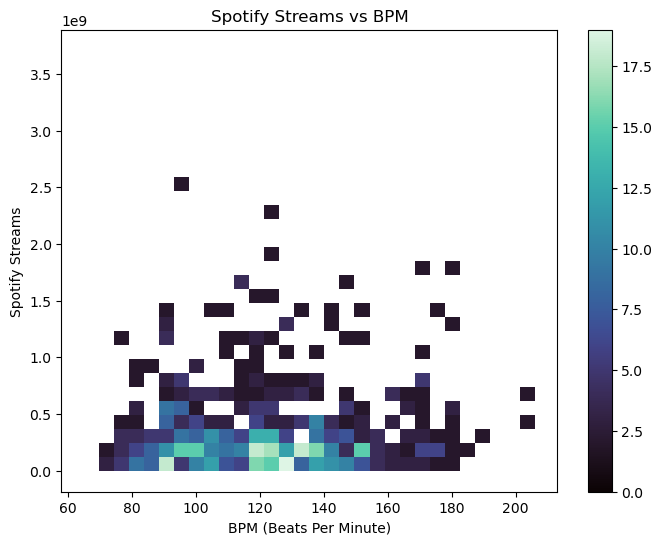

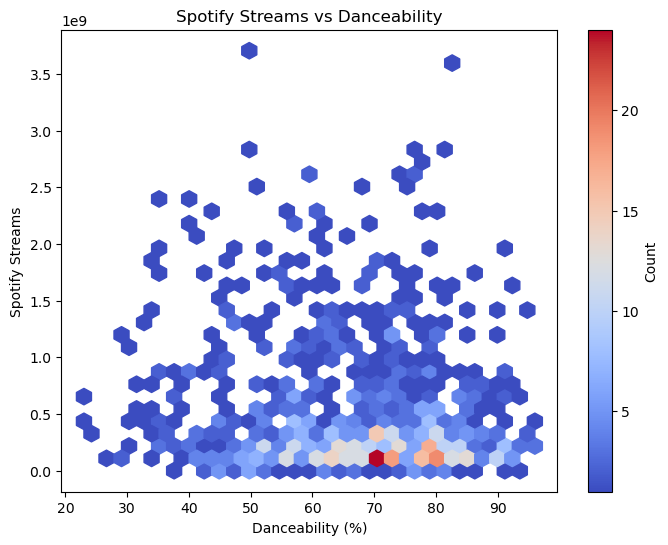

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


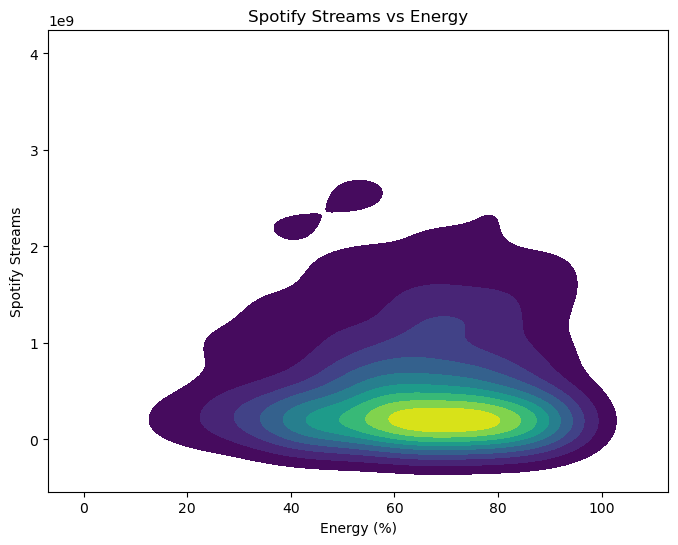

In [54]:
file_path = 'spotify_data_cleaned.csv'
spotify_data_cleaned = pd.read_csv(file_path)

# Which audio characteristics (BPM, danceability, or energy) have the strongest influence on Spotify streaming performance?

# Analyze correlation between bpm and streams with histogram and KDE
plt.figure(figsize=(8, 6))
sns.histplot(data=spotify_data_cleaned, x='bpm', y='streams', bins=30, pthresh=0.05, cmap="mako", cbar=True)
plt.title('Spotify Streams vs BPM')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Spotify Streams')
plt.savefig('spotify_streams_vs_bpm_improved.png')
plt.show()

# Analyze danceability vs streams with hexbin
plt.figure(figsize=(8, 6))
plt.hexbin(x=spotify_data_cleaned['danceability_%'], y=spotify_data_cleaned['streams'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Count')
plt.title('Spotify Streams vs Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Spotify Streams')
plt.savefig('spotify_streams_vs_danceability_improved.png')
plt.show()

# Analyze energy vs streams with contour plot
plt.figure(figsize=(8, 6))
sns.kdeplot(x=spotify_data_cleaned['energy_%'], y=spotify_data_cleaned['streams'], cmap="viridis", fill=True)
plt.title('Spotify Streams vs Energy')
plt.xlabel('Energy (%)')
plt.ylabel('Spotify Streams')
plt.savefig('spotify_streams_vs_energy_improved.png')
plt.show()




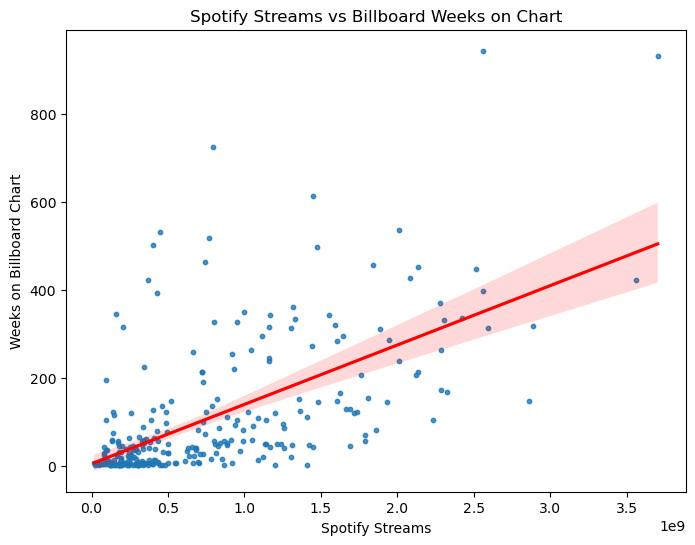

Pearson Correlation Coefficient: 0.62
P-Value: 1.37e-31
The correlation is statistically significant.


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Is there a significant relationship between Spotify streaming numbers and the longevity of songs on the Billboard charts?

# Scatter plot with regression line to visualize the relationship
plt.figure(figsize=(8, 6))
sns.regplot(
    x=merged_data_cleaned['streams'],
    y=merged_data_cleaned['weeks_on_chart'],
    scatter_kws={"s": 10},
    line_kws={"color": "red"}
)
plt.title('Spotify Streams vs Billboard Weeks on Chart')
plt.xlabel('Spotify Streams')
plt.ylabel('Weeks on Billboard Chart')
plt.savefig('Spotify_Streams_vs_Billboard_WeeksonChart.png')
plt.show()


# Calculate and print the correlation coefficient
correlation, p_value = pearsonr(merged_data_cleaned['streams'], merged_data_cleaned['weeks_on_chart'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-Value: {p_value:.2e}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


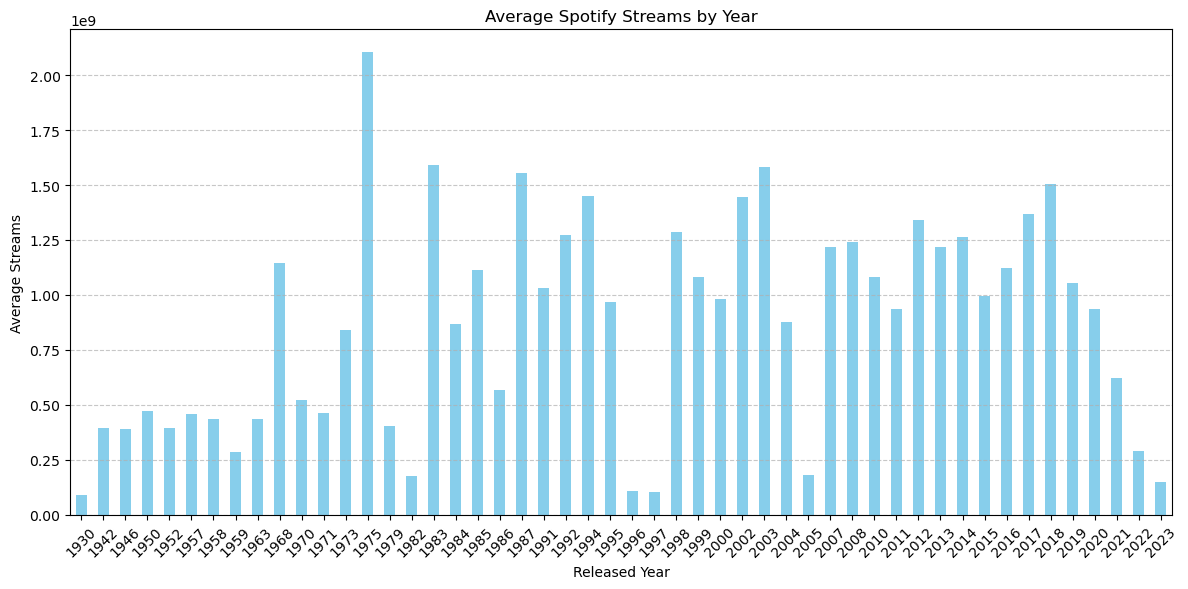

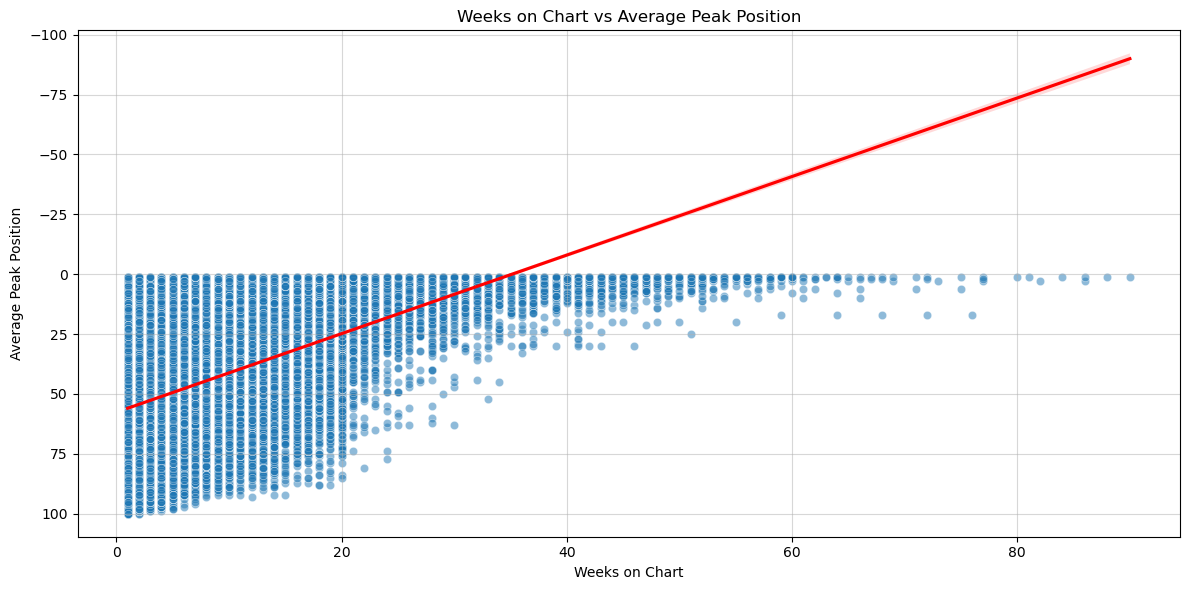

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload Spotify data
spotify_data_cleaned_path = 'spotify_data_cleaned.csv'
spotify_data_cleaned = pd.read_csv(spotify_data_cleaned_path)

# Reload Billboard data
billboard_data_path = 'billboard_hot_100_2000_to_current_monthly.csv'
billboard_data = pd.read_csv(billboard_data_path)

# Group Spotify streams by release year and calculate the average
spotify_streams_by_year = spotify_data_cleaned.groupby('released_year')['streams'].mean()

# Plot yearly trends for Spotify streams as a bar chart and save the plot
plt.figure(figsize=(12, 6))
spotify_streams_by_year.plot(kind='bar', color='skyblue', title='Average Spotify Streams by Year')
plt.xlabel('Released Year')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('average_spotify_streams_by_year.png')  # Save the plot
plt.show()

# Analyze Billboard weeks on chart trends: Use a scatter plot to show distribution and regression
plt.figure(figsize=(12, 6))
sns.scatterplot(x=billboard_data['weeks_on_chart'], y=billboard_data['peak_position'], alpha=0.5)
sns.regplot(
    x=billboard_data['weeks_on_chart'],
    y=billboard_data['peak_position'],
    scatter=False,
    line_kws={"color": "red"}
)
plt.title('Weeks on Chart vs Average Peak Position')
plt.xlabel('Weeks on Chart')
plt.ylabel('Average Peak Position')
plt.gca().invert_yaxis()  # Higher positions are better
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('weeks_on_chart_vs_peak_position.png')  # Save the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

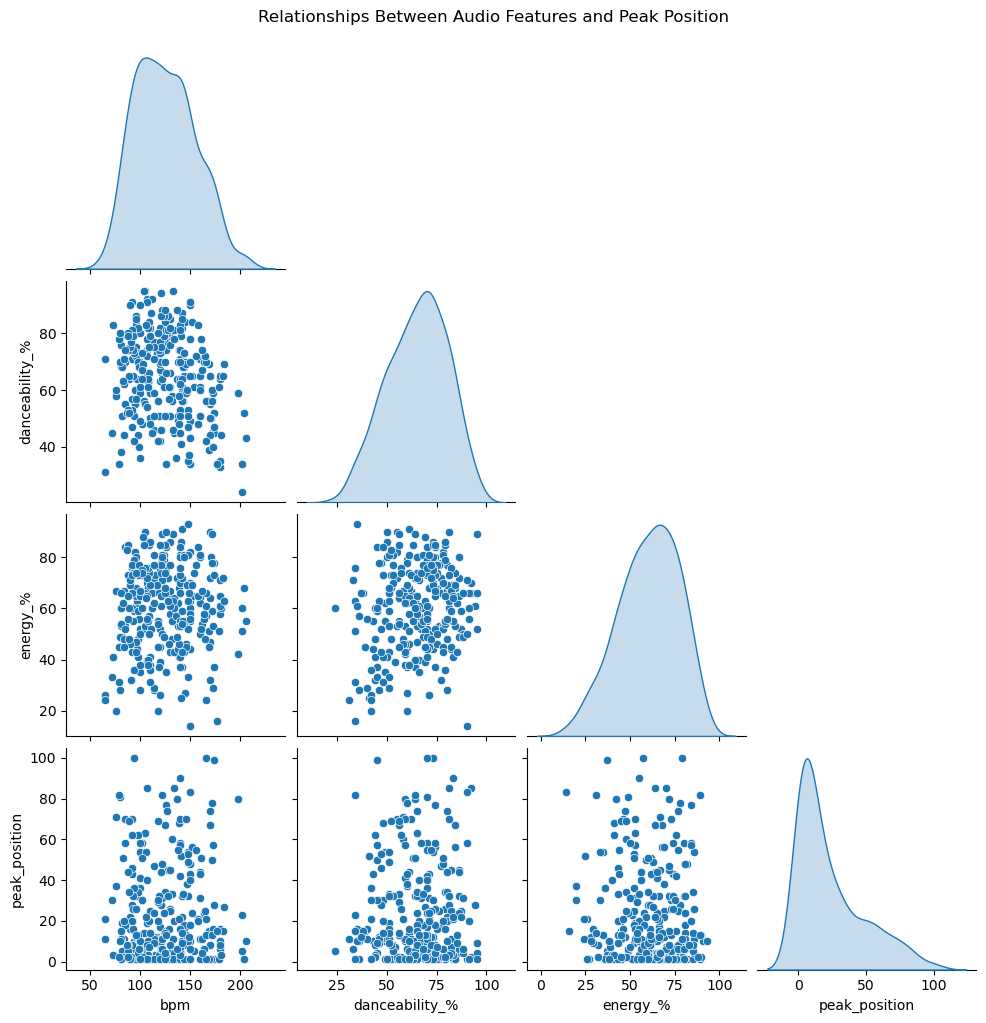

Spearman Correlation between bpm and Peak Position: 0.04 (p-value: 5.13e-01)
The correlation between bpm and Peak Position is not statistically significant.

Spearman Correlation between danceability_% and Peak Position: -0.03 (p-value: 5.87e-01)
The correlation between danceability_% and Peak Position is not statistically significant.

Spearman Correlation between energy_% and Peak Position: -0.07 (p-value: 2.49e-01)
The correlation between energy_% and Peak Position is not statistically significant.



In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# How do a song's audio characteristics (e.g., BPM, danceability, energy) influence its peak position on the Billboard chart?

# Pairplot to visualize relationships between audio characteristics and peak position
audio_features = ['bpm', 'danceability_%', 'energy_%', 'peak_position']
pairplot_data = merged_data_cleaned[audio_features]

pairplot = sns.pairplot(pairplot_data, diag_kind="kde", corner=True)
pairplot.fig.suptitle("Relationships Between Audio Features and Peak Position", y=1.02)
pairplot.savefig("audio_features_vs_peak_position.png")  # Save the plot as an image
plt.show()

# Spearman Correlation Coefficients
for feature in ['bpm', 'danceability_%', 'energy_%']:
    corr, p_value = spearmanr(merged_data_cleaned[feature], merged_data_cleaned['peak_position'])
    print(f"Spearman Correlation between {feature} and Peak Position: {corr:.2f} (p-value: {p_value:.2e})")

    if p_value < 0.05:
        print(f"The correlation between {feature} and Peak Position is statistically significant.\n")
    else:
        print(f"The correlation between {feature} and Peak Position is not statistically significant.\n")
